In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans


In [5]:
#let’s make some data to start
Data = {'x': [25,34,22,27,33,33,31,22,35,34,67,54,57,43,50,57,59,52,65,47,49,48,35,33,44,45,38,43,51,46],
        'y': [79,51,53,78,59,74,73,57,69,75,51,32,40,47,53,36,35,58,59,50,25,20,14,12,20,5,29,27,8,7]
       }
  
df = pd.DataFrame(Data,columns=['x','y'])
df.head()


,x,y
0,25,79
1,34,51
2,22,53
3,27,78
4,33,59


[[44.4        24.2       ]
 [30.8        53.4       ]
 [56.2        54.2       ]
 [30.83333333 74.66666667]
 [42.          9.2       ]
 [56.75       35.75      ]]


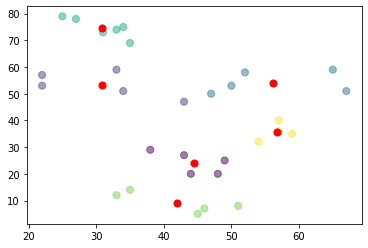

In [14]:
#first let’s fit s kmeans model based on a ‘k’ that you input yourself
kmeans = KMeans(n_clusters=6).fit(df)

centroids = kmeans.cluster_centers_
print(centroids)

plt.scatter(df['x'], df['y'], c= kmeans.labels_.astype(float), s=50, alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50)


In [15]:
# inertia on the fitted data
kmeans.inertia_

1438.0666666666668

is this good?  Why or why not?  Play with the number of clusters till you find the “ideal” inertia.  Is it better to have a lower or higher inerntia?
https://scikit-learn.org/stable/modules/clustering.html

Inertia is within-cluster sum-of-squares. The more cluster we have, the lower inertia is. With higher cluster number, the inertia decreases which results in more accurate prediction of cluster. However, if the number of cluster goes too high, it has the risk of overfitting and we will not be able to find the hidden pattern within the data.

In [16]:

#ok now let’s find the ideal number of clusters (or k) by looking at a silhouette graph
pred = kmeans.fit_predict(df)

from sklearn.metrics import silhouette_score
score = silhouette_score(df, pred, random_state=1)
score


0.49117979317348903

Text(0, 0.5, 'Inertia')

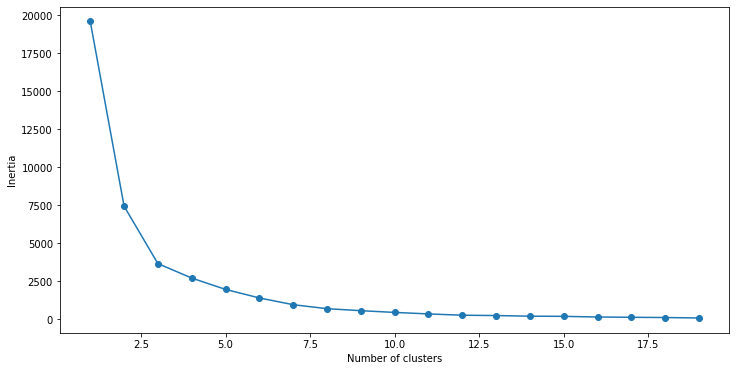

In [17]:
# fitting multiple k-means algorithms and storing the values in an empty list
SSE = []
for cluster in range(1,20):
    kmeans = KMeans(n_jobs = -1, n_clusters = cluster, init='k-means++')
    kmeans.fit(df)
    SSE.append(kmeans.inertia_)

# converting the results into a dataframe and plotting them
frame = pd.DataFrame({'Cluster':range(1,20), 'SSE':SSE})
plt.figure(figsize=(12,6))
plt.plot(frame['Cluster'], frame['SSE'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')


#What are the ideal number of clusters and why?  Check the SSE (Sum of squared errors) and Elbow method

The idea behind the elbow method is to identify the value of k where the distortion begins to decrease most rapidly. As we can see in the resulting plot, the elbow is located at k = 3, which is evidence that k = 3 is indeed a good choice for this dataset.

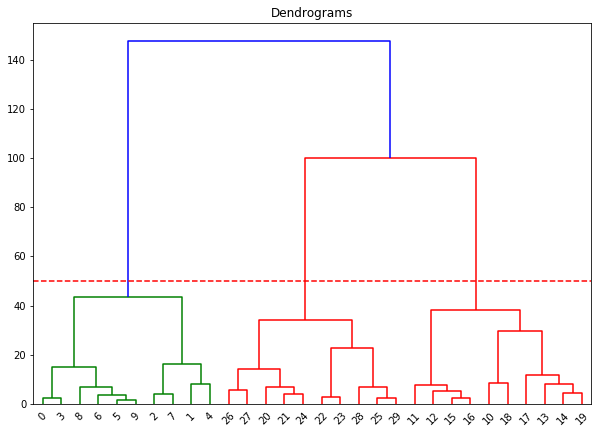

In [22]:
#OK! Now let’s try another type of clustering algorithm - hierarchical clustering
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(df, method='ward'))

#how many clusters should we have?
#https://www.displayr.com/what-is-dendrogram/
#using this code insert a value into the y value that you think should have

plt.axhline(y=50, color='r', linestyle='--')


#What did you learn from this exercise?<br>
How different ways of clustering work. <br>

#What is the benefit of kmeans?  What is the downside?
It can find the point that are closer to it cluster. However, if we have data like two circles, one is inside the other one, kmeans will not give good result. Also, it is hard to decide the number of cluster.<br>

#What is the benefit of hierarchical clustering?  What is the downside?<br>
hierarchical clustering is high in time complexity. But it is more informative than kmeans like telling you the ideal number of cluster.  


